In [2]:
facts  = ""
with open("recipe_model_wireframe_simple.pl","r") as file:
    for l in file:
        #if l.strip().startswith("%"):
        #    continue
        
        facts += l.strip() + "\n"

In [7]:
!clingo recipe_model_wireframe_simple.pl

clingo version 5.5.0
Reading from recipe_model_wireframe_simple.pl
Solving...
Answer: 1
accumulated_dq_problem(column_state(c1,2),lemmatize_char) accumulated_dq_problem(column_state(c1,1),lower_case) accumulated_dq_problem(column_state(c1,1),lemmatize_char)
SATISFIABLE

Models       : 1
Calls        : 1
Time         : 0.003s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)
CPU Time     : 0.003s


In [4]:
#facts

In [8]:
from clingo.symbol import Number
from clingo.control import Control

ctl = Control()
ctl.add("base", [], facts)

In [9]:
ctl.ground([("base", [])])
solver = ctl.solve(yield_=True)

In [10]:
output = []
for x in solver:
    output.append(x)

In [11]:
df_output = {}
df_output_str = {}
for s in x.context.symbolic_atoms.signatures:
    #print(s)
    df_output[(s[0],s[1])] = []
    df_output_str[(s[0],s[1])] = []
    for y in x.context.symbolic_atoms.by_signature(s[0],s[1]):
        temp_tuple = [y.symbol.name]
        temp_tuple = temp_tuple + [str(z) for z in y.symbol.arguments]
        df_output[(s[0],s[1])].append(y.symbol)
        df_output_str[(s[0],s[1])].append(temp_tuple)

In [12]:
x.context.symbolic_atoms.signatures

[('column_schema', 3, True),
 ('workflow_step', 4, True),
 ('step_input_schema', 4, True),
 ('workflow_input_violation', 4, True),
 ('step_input_blueprint', 4, True),
 ('step_input_satisfiable', 6, True),
 ('step_output_schema', 4, True),
 ('workflow_output_violation', 4, True),
 ('dq_problem', 2, True),
 ('step_dq_problem', 3, True),
 ('dq_problem_violation', 3, True),
 ('process', 2, True),
 ('dq_proxy', 3, True),
 ('recipe_edge', 3, True),
 ('recipe_path', 4, True),
 ('process_edge', 4, True),
 ('column_edge', 3, True),
 ('column_path', 3, True),
 ('select_path', 3, True),
 ('accumulated_dq_handling', 2, True),
 ('accumulated_dq_problem', 2, True),
 ('column', 4, True),
 ('input_process', 3, True),
 ('output_process', 3, True),
 ('parameter', 4, True)]

In [13]:
import pandas as pd
pd.DataFrame(df_output_str[("step_input_schema",4)])

,0,1,2,3,4
0,step_input_schema,1,"column_state(c1,1)",p1,"column_schema(cs1,name,full_name)"
1,step_input_schema,2,"column_state(c1,2)",p2,"column_schema(cs1,name,full_name)"
2,step_input_schema,1,"column_state(c1,1)",p1,"column_schema(cs1,data_type,text)"
3,step_input_schema,2,"column_state(c1,2)",p2,"column_schema(cs1,data_type,text)"


In [14]:
import pandas as pd
pd.DataFrame(df_output_str[("workflow_step",4)])

,0,1,2,3,4
0,workflow_step,1,"column_state(c1,1)",p1,"column_state(c1,2)"
1,workflow_step,2,"column_state(c1,2)",p2,"column_state(c1,3)"


In [15]:
import pandas as pd
pd.DataFrame(df_output_str[("workflow_input_violation",4)])

""


In [16]:
import pandas as pd
pd.DataFrame(df_output_str[("workflow_output_violation",4)])

""


In [17]:
df_output[("step_input_schema",4)]

[Function('step_input_schema', [Number(1), Function('column_state', [Function('c1', [], True), Number(1)], True), Function('p1', [], True), Function('column_schema', [Function('cs1', [], True), Function('name', [], True), Function('full_name', [], True)], True)], True),
 Function('step_input_schema', [Number(2), Function('column_state', [Function('c1', [], True), Number(2)], True), Function('p2', [], True), Function('column_schema', [Function('cs1', [], True), Function('name', [], True), Function('full_name', [], True)], True)], True),
 Function('step_input_schema', [Number(1), Function('column_state', [Function('c1', [], True), Number(1)], True), Function('p1', [], True), Function('column_schema', [Function('cs1', [], True), Function('data_type', [], True), Function('text', [], True)], True)], True),
 Function('step_input_schema', [Number(2), Function('column_state', [Function('c1', [], True), Number(2)], True), Function('p2', [], True), Function('column_schema', [Function('cs1', [], 

In [18]:
df_output_str[("output_process",3)]

[['output_process', 'p1', '1', 'cs1'], ['output_process', 'p2', '1', 'cs1']]

In [19]:
df_output_str[("process",2)]

[['process', 'p1', 'lower_case'], ['process', 'p2', 'lemmatize_char']]

In [20]:
df_output_str[("column_schema",3)]

[['column_schema', 'cs1', 'name', 'full_name'],
 ['column_schema', 'cs1', 'data_type', 'text']]

In [21]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

# process nodes
for p in df_output_str[("process",2)]:
    single_process+='''
    "{pid}" [shape=record rankdir=LR label="{{<f0> {pid} ({process_name}) }}"];
    '''.format(pid=p[1],process_name=p[2])

# schema nodes
for cs in df_output_str[("column_schema",3)]:    
    column_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1],label=cs[1])
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3])
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])   

# edge input output
for inp in df_output_str[("input_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=inp[3],output=inp[1],data="")            

for out in df_output_str[("output_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=out[1],output=out[3],data="")            

                        

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer



In [22]:
print(gv_string)


/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0

/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */

    "p1" [shape=record rankdir=LR label="{<f0> p1 (lower_case) }"];
    
    "p2" [shape=record rankdir=LR label="{<f0> p2 (lemmatize_char) }"];
    
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */

    "cs1" [shape=record rankdir=LR label="{<f0> cs1 }"]
    
    "cs1" [shape=record rankdir=LR label="{<f0> cs1 }"]
    
/* Style for nodes representing parameter channels

In [23]:
from IPython.display import Image
def generate_pdf(gv_string,filename="temp"):
    input = filename+".gv"
    with open(input,"w") as file:
        file.write(gv_string)
    output = filename+".png"    
    !dot -Tpng -o $output $input 
    return Image(filename=output) 

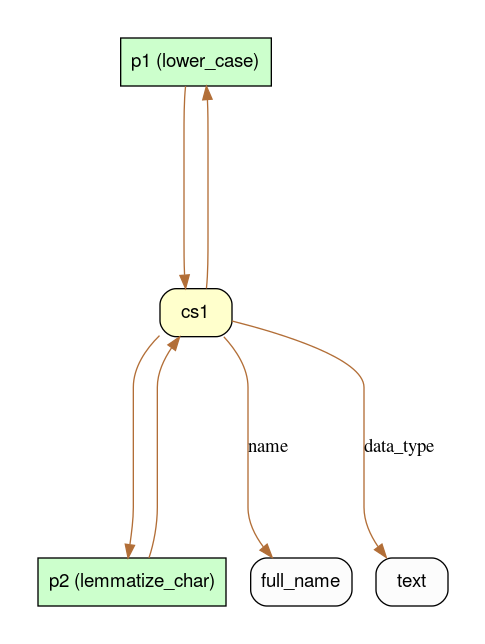

In [24]:
generate_pdf(gv_string,"process_model")

# workflow step (wireframe)

In [25]:
df_output_str[("workflow_step",4)]

[['workflow_step', '1', 'column_state(c1,1)', 'p1', 'column_state(c1,2)'],
 ['workflow_step', '2', 'column_state(c1,2)', 'p2', 'column_state(c1,3)']]

In [26]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""

freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

node_col = set()
node_step = set()
node_edges = set()

for s,fn in zip(df_output_str[("workflow_step",4)],df_output[("workflow_step",4)]):
    if s[2] not in node_col:
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=s[2],label=s[2])
        node_col.add(s[2])
        

    if s[4] not in node_col:
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=s[4],label=s[4])
        node_col.add(s[4])
        
        
    if s[1]+"_"+s[3] not in node_step:
        single_process+='''
        "{pid}" [shape=record rankdir=LR label="{{<f0> step {step_id} ({process_name}) }}"];
        '''.format(pid=s[1]+"_"+s[3],step_id=s[1],process_name=s[3])
        node_step.add(s[1]+"_"+s[3])
        
    
    if s[2]+"_"+s[1]+"_"+s[3] not in node_edges:
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=s[2],output=s[1]+"_"+s[3],data="")
        node_edges.add(s[2]+"_"+s[1]+"_"+s[3])
    
    if s[1]+"_"+s[3]+"_"+s[4] not in node_edges:
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=s[1]+"_"+s[3],output=s[4],data="") 
        node_edges.add(s[1]+"_"+s[3]+"_"+s[4])
        
gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer

In [27]:
print(gv_string)


/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0

/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */

        "1_p1" [shape=record rankdir=LR label="{<f0> step 1 (p1) }"];
        
        "2_p2" [shape=record rankdir=LR label="{<f0> step 2 (p2) }"];
        
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */

        "column_state(c1,1)" [shape=record rankdir=LR label="{<f0> column_state(c1,1) }"]
        
        "column_state(c1,2)" [shape=record rankdir=LR label="{<f0

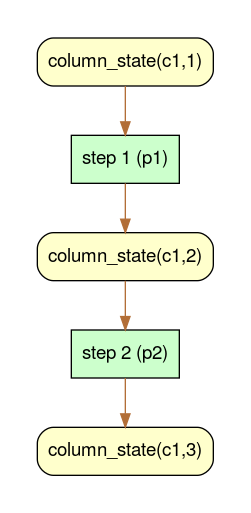

In [28]:
generate_pdf(gv_string,"workflow_step")

In [29]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

column_schema_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled,dashed" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]
"""

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled,dashed" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

# process nodes
for p in df_output_str[("process",2)]:
    freq_pattern_nodes+='''
    "{pid}" [shape=record rankdir=LR label="{{<f0> {pid} ({process_name}) }}"];
    '''.format(pid=p[1],process_name=p[2])

# schema nodes
for cs in df_output_str[("column_schema",3)]:    
    column_schema_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1],label=cs[1])
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3])
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])   

# edge input output
for inp in df_output_str[("input_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=inp[3],output=inp[1],data="")            

for out in df_output_str[("output_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=out[1],output=out[3],data="")            


node_col = set()
node_step = set()
node_edges = set()

cl_sc_map = {}
for cl in df_output_str[("column",4)]:
    cl_sc_map[cl[1]] = cl[3]

for s,fn in zip(df_output_str[("workflow_step",4)],df_output[("workflow_step",4)]):
    if s[2] not in node_col:
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=s[2],label=s[2])
        node_col.add(s[2])
        
        #print(fn.)
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[2],output=cl_sc_map[fn.arguments[1].arguments[0].name],data="associatedWith")
        node_edges.add(s[2]+"_"+cl_sc_map[fn.arguments[1].arguments[0].name])
        
    if s[4] not in node_col:
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=s[4],label=s[4])
        node_col.add(s[4])
        
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[4],output=cl_sc_map[fn.arguments[3].arguments[0].name],data="associatedWith")
        node_edges.add(s[4]+"_"+cl_sc_map[fn.arguments[3].arguments[0].name])
        
    if s[1]+"_"+s[3] not in node_step:
        single_process+='''
        "{pid}" [shape=record rankdir=LR label="{{<f0> step {step_id} ({process_name}) }}"];
        '''.format(pid=s[1]+"_"+s[3],step_id=s[1],process_name=s[3])
        node_step.add(s[1]+"_"+s[3])
        
        edges+="""
        "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[1]+"_"+s[3],output=s[3],data="associatedWith")
        node_edges.add(s[1]+"_"+s[3]+"_"+s[3])
    
    if s[2]+"_"+s[1]+"_"+s[3] not in node_edges:
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=s[2],output=s[1]+"_"+s[3],data="")
        node_edges.add(s[2]+"_"+s[1]+"_"+s[3])
    
    if s[1]+"_"+s[3]+"_"+s[4] not in node_edges:
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=s[1]+"_"+s[3],output=s[4],data="") 
        node_edges.add(s[1]+"_"+s[3]+"_"+s[4])
            
            
            
gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer



In [30]:
fn.arguments[1].arguments[0].name

'c1'

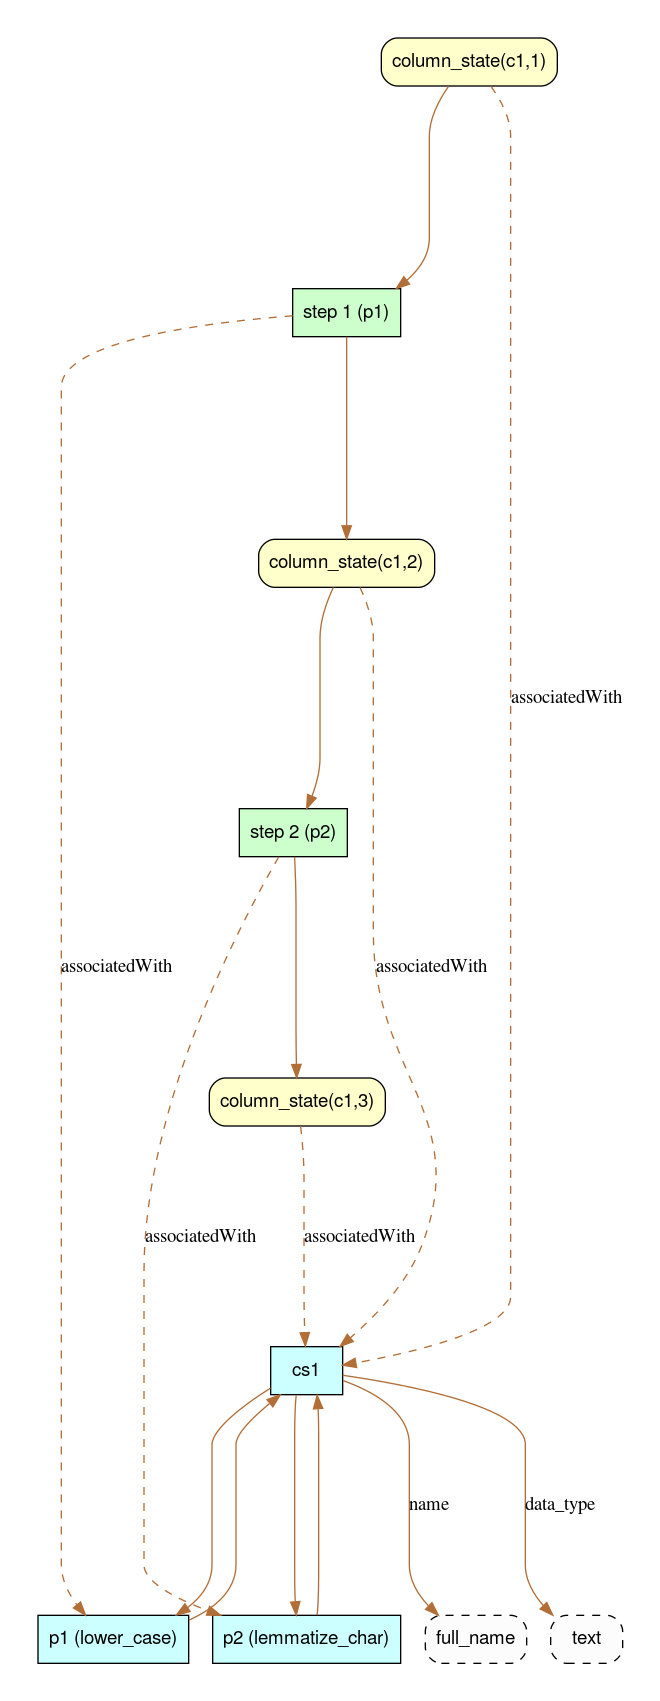

In [31]:
generate_pdf(gv_string,"workflow_step")

In [36]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=LR

"""

sub_graph_workflow_step = """
subgraph cluster_0 { label="workflow_step"; color="blue";
"""

end_sub_graph_workflow_step = """
}
"""

sub_graph_process = """
subgraph cluster_1 { label="process_signature"; color="gray";
"""

end_sub_graph_process = """
}
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

column_schema_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled,dashed" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]
"""

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled,dashed" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """

/* End of top-level graph */
}
"""

# process nodes
for p in df_output_str[("process",2)]:
    freq_pattern_nodes+='''
    "{pid}" [shape=record rankdir=LR label="{{<f0> {pid} ({process_name}) }}"];
    '''.format(pid=p[1],process_name=p[2])

# schema nodes
for cs in df_output_str[("column_schema",3)]:    
    column_schema_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1],label=cs[1])
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3])
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])   

# edge input output
for inp in df_output_str[("input_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=inp[3],output=inp[1],data="")            

for out in df_output_str[("output_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=out[1],output=out[3],data="")            


node_col = set()
node_step = set()
node_edges = set()

cl_sc_map = {}
for cl in df_output_str[("column",4)]:
    cl_sc_map[cl[1]] = cl[3]

for s,fn in zip(df_output_str[("workflow_step",4)],df_output[("workflow_step",4)]):
    if s[2] not in node_col:
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=s[2],label=s[2])
        node_col.add(s[2])
        
        #print(fn.)
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[2],output=cl_sc_map[fn.arguments[1].arguments[0].name],data="associatedWith")
        node_edges.add(s[2]+"_"+cl_sc_map[fn.arguments[1].arguments[0].name])
        
    if s[4] not in node_col:
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=s[4],label=s[4])
        node_col.add(s[4])
        
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[4],output=cl_sc_map[fn.arguments[3].arguments[0].name],data="associatedWith")
        node_edges.add(s[4]+"_"+cl_sc_map[fn.arguments[3].arguments[0].name])
        
    if s[1]+"_"+s[3] not in node_step:
        single_process+='''
        "{pid}" [shape=record rankdir=LR label="{{<f0> step {step_id} ({process_name}) }}"];
        '''.format(pid=s[1]+"_"+s[3],step_id=s[1],process_name=s[3])
        node_step.add(s[1]+"_"+s[3])
        
        edges+="""
        "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[1]+"_"+s[3],output=s[3],data="associatedWith")
        node_edges.add(s[1]+"_"+s[3]+"_"+s[3])
    
    if s[2]+"_"+s[1]+"_"+s[3] not in node_edges:
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=s[2],output=s[1]+"_"+s[3],data="")
        node_edges.add(s[2]+"_"+s[1]+"_"+s[3])
    
    if s[1]+"_"+s[3]+"_"+s[4] not in node_edges:
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=s[1]+"_"+s[3],output=s[4],data="") 
        node_edges.add(s[1]+"_"+s[3]+"_"+s[4])
            
            
            
#gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer

gv_string = header+sub_graph_workflow_step+single_process+column_nodes+end_sub_graph_workflow_step+sub_graph_process+parameters_nodes+side_b_process+side_a_data+side_b_data+column_schema_nodes+freq_pattern_nodes+end_sub_graph_process+edges+footer


In [37]:
print(gv_string)


/* Start of top-level graph */
digraph Workflow {
rankdir=LR


subgraph cluster_0 { label="workflow_step"; color="blue";

/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */

        "1_p1" [shape=record rankdir=LR label="{<f0> step 1 (p1) }"];
        
        "2_p2" [shape=record rankdir=LR label="{<f0> step 2 (p2) }"];
        
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */

        "column_state(c1,1)" [shape=record rankdir=LR label="{<f0> column_state(c1,1) }"]
        
        "column_state(c1,2)" [shape=record rankdir=LR label="{<f0> column_state(c1,2) }"]
        
        "column_state(c1,3)" [shape=record rankdir=LR label="{<f0> column_state(c1,3) }"]
      

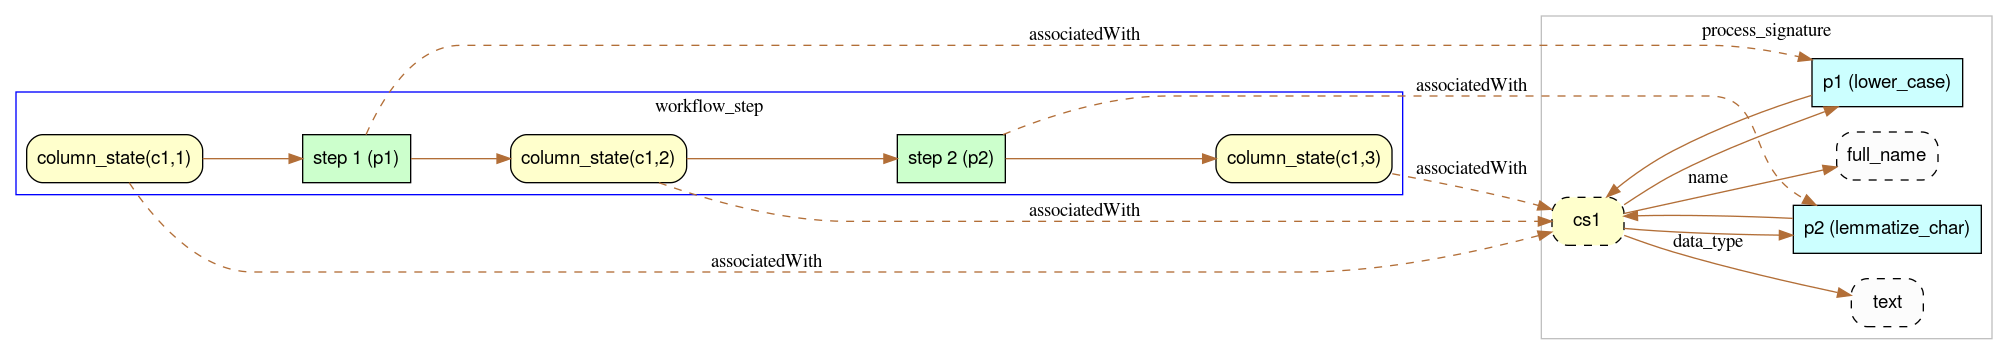

In [38]:
generate_pdf(gv_string,"workflow_step_2")

In [39]:
import pandas as pd
pd.DataFrame(df_output_str[("accumulated_dq_problem",2)])
accumulated_dq = {}
for p,fp in zip(df_output_str[("accumulated_dq_problem",2)],df_output[("accumulated_dq_problem",2)]):
    #pp = [str(x) for x in fp.arguments[0].arguments]
    try:
        accumulated_dq[p[1]]
    except:
        accumulated_dq[p[1]] = []
    accumulated_dq[p[1]].append(p[2])

In [40]:
pd.DataFrame(df_output_str[("process",2)])


,0,1,2
0,process,p1,lower_case
1,process,p2,lemmatize_char


In [41]:
accumulated_dq

{'column_state(c1,2)': ['lemmatize_char'],
 'column_state(c1,1)': ['lower_case', 'lemmatize_char']}

In [42]:
import pandas as pd
workflow_input_violation = {}
for p,fp in zip(df_output_str[("workflow_input_violation",4)],df_output[("workflow_input_violation",4)]):
    if p[2] == "unexpected":
        #workflow_input_violation[(p[1],p[4])] = [x.name for x in fp.arguments[2].arguments]
        #workflow_input_violation[(p[4],p[1],p[3])] = (p[4],p[1],p[3])
        pass
    if p[2] == "missing":
        workflow_input_violation[(p[1],p[3])] = [x.name for x in fp.arguments[3].arguments]

In [43]:
import pandas as pd
workflow_output_violation = {}
for p,fp in zip(df_output_str[("workflow_output_violation",4)],df_output[("workflow_output_violation",4)]):
    if p[2] == "unexpected":
        #workflow_input_violation[(p[1],p[4])] = [x.name for x in fp.arguments[2].arguments]
        #workflow_input_violation[(p[4],p[1],p[3])] = (p[4],p[1],p[3])
        pass
    if p[2] == "missing":
        workflow_output_violation[(p[1],p[3])] = [x.name for x in fp.arguments[3].arguments]

In [44]:
process_name = {}
for p in df_output_str[("process",2)]:
    process_name[p[1]] = p[2]


In [45]:
column_schema = {}
for p in df_output_str[("column",4)]:
    column_schema[p[1]] = p[3]

In [46]:
workflow_input_violation

{}

In [47]:
workflow_output_violation

{}

In [62]:
# visualize using graphviz yw layout

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

"""

sub_graph_workflow_step = """
subgraph cluster_0 { label="workflow_step"; color="green";
"""

end_sub_graph_workflow_step = """
}
"""

sub_graph_process = """
subgraph cluster_1 { label="process_signature"; color="blue";
"""

end_sub_graph_process = """
}
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];

process_violation = """
/* Style for violation of process because of missing parameter  */
node[shape=box style=filled fillcolor="#FFCCCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

column_schema_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled,dashed" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]
"""

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled,dashed" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

parameters_dqproblem = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled,dashed" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""


edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """

/* End of top-level graph */
}
"""

# process nodes
for p in df_output_str[("process",2)]:
    freq_pattern_nodes+='''
    "{pid}" [shape=record rankdir=LR label="{{<f0> {pid} ({process_name}) }}"];
    '''.format(pid=p[1],process_name=p[2])

# schema nodes
for cs in df_output_str[("column_schema",3)]:    
    column_schema_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1],label=cs[1])
    parameters_nodes+="""
    "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
    """.format(node_name=cs[1]+"_"+cs[2],label=cs[3])
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])   

# edge input output
for inp in df_output_str[("input_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=inp[3],output=inp[1],data="")            

for out in df_output_str[("output_process",3)]:                    
    edges+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=out[1],output=out[3],data="")            


node_col = set()
node_step = set()
node_edges = set()

cl_sc_map = {}
for cl in df_output_str[("column",4)]:
    cl_sc_map[cl[1]] = cl[3]

for s,fn in zip(df_output_str[("workflow_step",4)],df_output[("workflow_step",4)]):
    if s[2] not in node_col:
        cl = fn.arguments[1].arguments[0].name
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} ({schema}) }}"]
        """.format(node_name=s[2],label=s[2],schema=column_schema[cl])
        node_col.add(s[2])
        
        #print(fn.)
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[2],output=cl_sc_map[fn.arguments[1].arguments[0].name],data="associatedWith")
        node_edges.add(s[2]+"_"+cl_sc_map[fn.arguments[1].arguments[0].name])
        
        # add dq_problem parameter
        if s[2] in accumulated_dq:
            for nn in accumulated_dq[s[2]]:
                #print(nn)
                parameters_dqproblem+="""
                "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
                """.format(node_name=s[2]+"_"+nn,label=nn)
                edges+="""
                "{input}" -> "{output}" [label="{data}" weight=14 color="#ccccff" tooltip="" labeltooltip=""]    
                """.format(input=s[2]+"_"+nn,output=s[2],data="dq")
        
        
    if s[4] not in node_col:
        cl = fn.arguments[3].arguments[0].name
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} ({schema}) }}"]
        """.format(node_name=s[4],label=s[4],schema=column_schema[cl])
        node_col.add(s[4])
        
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[4],output=cl_sc_map[fn.arguments[3].arguments[0].name],data="associatedWith")
        node_edges.add(s[4]+"_"+cl_sc_map[fn.arguments[3].arguments[0].name])
        
        if s[4] in accumulated_dq:
            for nn in accumulated_dq[s[4]]:
                #print(nn)
                parameters_dqproblem+="""
                "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
                """.format(node_name=s[4]+"_"+nn,label=nn)
                edges+="""
                "{input}" -> "{output}" [label="{data}" weight=14 color="#ccccff" tooltip="" labeltooltip=""]    
                """.format(input=s[4]+"_"+nn,output=s[4],data="dq")
        
        
        
        
    if s[1]+"_"+s[3] not in node_step:
        #print(s[1],s[3]) 
        if (s[1],s[3]) in workflow_input_violation:
            #print("violation")
            process_violation+='''
            "{pid}" [shape=record rankdir=LR label="{{<f0> step {step_id} ({process_name}) }}"];
            '''.format(pid=s[1]+"_"+s[3],step_id=s[1],process_name=s[3]+"-"+process_name[s[3]])
            node_step.add(s[1]+"_"+s[3])
            
            # missing parameter
            missing_param = workflow_input_violation[(s[1],s[3])]
            edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
            """.format(output=s[1]+"_"+s[3],input=missing_param[0]+"_"+missing_param[1],data="",color=color)
            node_edges.add(s[1]+"_"+s[3]+"_"+missing_param[0]+"_"+missing_param[1])
        else:
            # get common process name            
            
            single_process+='''
            "{pid}" [shape=record rankdir=LR label="{{<f0> step {step_id} ({process_name}) }}"];
            '''.format(pid=s[1]+"_"+s[3],step_id=s[1],process_name=s[3]+"-"+process_name[s[3]])
            node_step.add(s[1]+"_"+s[3])

        if (s[1],s[3]) in workflow_output_violation:
            # missing parameter
            missing_param = workflow_output_violation[(s[1],s[3])]
            edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#ff0000" tooltip="" labeltooltip=""]    
            """.format(input=s[1]+"_"+s[3],output=missing_param[0]+"_"+missing_param[1],data="",color=color)
            node_edges.add(s[1]+"_"+s[3]+"_"+missing_param[0]+"_"+missing_param[1])
                                    
        edges+="""
        "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="" style="dashed"]    
        """.format(input=s[1]+"_"+s[3],output=s[3],data="associatedWith")
        node_edges.add(s[1]+"_"+s[3]+"_"+s[3])
    
    if s[2]+"_"+s[1]+"_"+s[3] not in node_edges:
        # check if it is an input violation error
        #print(s[2],s[3])
        if (s[2],s[1],s[3]) in workflow_input_violation:
            color = "#ff0000"
        else:
            color = "#b26e37"
        
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="{color}" tooltip="" labeltooltip=""]    
        """.format(input=s[2],output=s[1]+"_"+s[3],data="",color=color)
        node_edges.add(s[2]+"_"+s[1]+"_"+s[3])
    
    if s[1]+"_"+s[3]+"_"+s[4] not in node_edges:
        edges+="""
            "{input}" -> "{output}" [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=s[1]+"_"+s[3],output=s[4],data="") 
        node_edges.add(s[1]+"_"+s[3]+"_"+s[4])
            
            
            
#gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer

gv_string = header+sub_graph_workflow_step+ \
    single_process+process_violation+column_nodes+parameters_dqproblem+end_sub_graph_workflow_step+ \
    sub_graph_process+parameters_nodes+side_b_process+side_a_data+side_b_data+ \
    column_schema_nodes+freq_pattern_nodes+end_sub_graph_process+edges+footer


In [63]:
print(gv_string)


/* Start of top-level graph */
digraph Workflow {
rankdir=TB


subgraph cluster_0 { label="workflow_step"; color="green";

/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */

            "1_p1" [shape=record rankdir=LR label="{<f0> step 1 (p1-lower_case) }"];
            
            "2_p2" [shape=record rankdir=LR label="{<f0> step 2 (p2-lemmatize_char) }"];
            
/* Style for violation of process because of missing parameter  */
node[shape=box style=filled fillcolor="#FFCCCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */

/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */

        "column_state(c1,1)" [shape=record rank

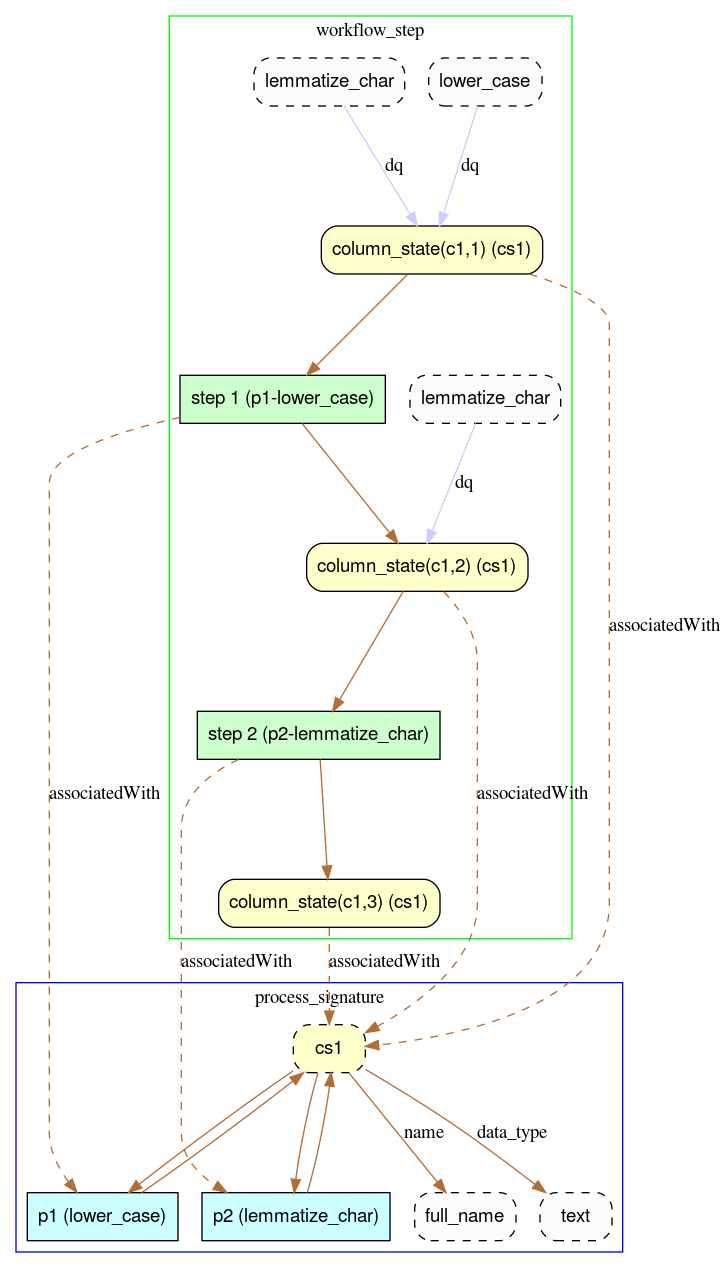

In [64]:
generate_pdf(gv_string,"workflow_step_violation")

In [ ]:
# https://dreampuf.github.io/GraphvizOnline/#%0A%2F*%20Start%20of%20top-level%20graph%20*%2F%0Adigraph%20Workflow%20%7B%0Arankdir%3DLR%0A%0A%0Asubgraph%20cluster_0%20%7B%20label%3D%22workflow_step%22%3B%20color%3D%22green%22%3B%0A%0A%2F*%20Style%20for%20nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20step%201%20(p1-lower_case)%20%7D%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20step%202%20(p2-lemmatize_char)%20%7D%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20violation%20of%20process%20because%20of%20missing%20parameter%20%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23FFCCCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20for%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20column_state(c1%2C1)%20(cs1)%20%7D%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20column_state(c1%2C2)%20(cs1)%20%7D%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20column_state(c1%2C3)%20(cs1)%20%7D%22%5D%0A%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20lower_case%20%7D%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20lemmatize_char%20%7D%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20lemmatize_char%20%7D%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%7D%0A%0Asubgraph%20cluster_1%20%7B%20label%3D%22process_lower_case%22%3B%20color%3D%22blue%22%3B%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22cs1_lower_case%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20cs1%20%7D%22%5D%0A%20%20%20%20%0A%20%20%20%20%22cs1_lower_case_min%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20cs1%20%7D%22%5D%0A%20%20%20%20%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22p1%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20p1%20(lower_case)%20%7D%22%5D%3B%0A%20%20%20%20%0A%20%20%20%20%0A%7D%0A%0Asubgraph%20cluster_2%20%7B%20label%3D%22process_lem_char%22%3B%20color%3D%22blue%22%3B%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22cs1_lem_char%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20cs1%20%7D%22%5D%0A%0A%20%20%20%20%22cs1_lem_char_min%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20cs1%20%7D%22%5D%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22p2%22%20%5Bshape%3Drecord%20rankdir%3DLR%20label%3D%22%7B%3Cf0%3E%20p2%20(lemmatize_char)%20%7D%22%5D%3B%0A%20%20%20%20%0A%7D%0A%0A%0A%0A%2F*%20Edges%20representing%20connections%20between%20programs%20and%20channels%20*%2F%0A%0A%0A%20%20%20%20%20%20%20%20cs1_lower_case%20-%3E%20p1%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20cs1_lem_char%20-%3E%20p2%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p1%20-%3E%20cs1_lower_case_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p2%20-%3E%20cs1_lem_char_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%22cs1_lower_case%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lower_case_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lem_char%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22p1%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%221_p1%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20-%3E%20%22cs1_lem_char_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22p2%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%222_p2%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22column_state(c1%2C3)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%0A%0A%20%20%20%20%2F%2F%7Brank%20%3D%20same%3B%20%22column_state(c1%2C1)%22%20%3B%20cs1_lower_case%3B%7D%0A%0A%0A%0A%0A%2F*%20End%20of%20top-level%20graph%20*%2F%0A%7D%0A%0A

# https://dreampuf.github.io/GraphvizOnline/#%0A%2F*%20Start%20of%20top-level%20graph%20*%2F%0Adigraph%20Workflow%20%7B%0Arankdir%3DLR%0A%0A%0Asubgraph%20cluster_0%20%7B%20label%3D%22workflow_step%22%3B%20color%3D%22green%22%3B%0A%0A%2F*%20Style%20for%20nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22step%201%20(p1-lower_case)%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22step%202%20(p2-lemmatize_char)%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20violation%20of%20process%20because%20of%20missing%20parameter%20%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23FFCCCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20for%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22column_state(c1%2C1)%20(cs1)%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22column_state(c1%2C2)%20(cs1)%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22column_state(c1%2C3)%20(cs1)%22%5D%0A%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lower_case%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lemmatize_char%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lemmatize_char%22%5D%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22lower_case_cs1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lower_case%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22lematize_char_cs2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lemmatize_char%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%7D%0A%0Asubgraph%20cluster_1%20%7B%20label%3D%22process_lower_case%22%3B%20color%3D%22blue%22%3B%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22cs1_lower_case%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%20%20%20%20%0A%20%20%20%20%22cs1_lower_case_min%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22p1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22p1%20(lower_case)%22%5D%3B%0A%20%20%20%20%0A%20%20%20%20%0A%7D%0A%0Asubgraph%20cluster_2%20%7B%20label%3D%22process_lem_char%22%3B%20color%3D%22blue%22%3B%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22cs1_lem_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%0A%20%20%20%20%22cs1_lem_char_min%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22p2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22p2%20(lemmatize_char)%22%5D%3B%0A%20%20%20%20%0A%7D%0A%0A%0A%0A%2F*%20Edges%20representing%20connections%20between%20programs%20and%20channels%20*%2F%0A%0A%0A%20%20%20%20%20%20%20%20cs1_lower_case%20-%3E%20p1%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20cs1_lem_char%20-%3E%20p2%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p1%20-%3E%20cs1_lower_case_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p2%20-%3E%20cs1_lem_char_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%22cs1_lower_case%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lower_case_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lem_char%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22p1%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%221_p1%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20-%3E%20%22cs1_lem_char_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22p2%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%222_p2%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22column_state(c1%2C3)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22lower_case_cs1%22%20-%3E%20%22cs1_lower_case%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22lematize_char_cs2%22%20-%3E%20%22cs1_lem_char%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%0A%0A%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C1)%22%3B%20%22cs1_lower_case%22%3B%20%22column_state(c1%2C1)_lemmatize_char%22%3B%20%22column_state(c1%2C1)_lower_case%22%2C%20%22lower_case_cs1%22%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20p1%3B%20%221_p1%22%3B%7D%0A%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C2)%22%3B%20%22cs1_lower_case_min%22%3B%20%22lematize_char_cs2%22%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20p2%3B%20%222_p2%22%3B%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C2)%22%3B%20%22cs1_lem_char%22%3B%22column_state(c1%2C2)_lemmatize_char%22%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C3)%22%3B%20%22cs1_lem_char_min%22%3B%7D%20%20%20%20%0A%0A%0A%0A%0A%2F*%20End%20of%20top-level%20graph%20*%2F%0A%7D%0A%0A

# https://dreampuf.github.io/GraphvizOnline/#%0A%2F*%20Start%20of%20top-level%20graph%20*%2F%0Adigraph%20Workflow%20%7B%0Arankdir%3DLR%0A%0A%0A%2F*%20Style%20for%20nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22step%201%20(p1-lower_case)%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22step%202%20(p2-lemmatize_char)%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20violation%20of%20process%20because%20of%20missing%20parameter%20%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23FFCCCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20for%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22column_state(c1%2C1)%20(cs1)%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22column_state(c1%2C2)%20(cs1)%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22column_state(c1%2C3)%20(cs1)%22%5D%0A%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lower_case%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lemmatize_char%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lemmatize_char%22%5D%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22lower_case_cs1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lower_case%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22lematize_char_cs2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22lemmatize_char%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22cs1_lower_case%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%20%20%20%20%0A%20%20%20%20%22cs1_lower_case_min%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22p1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22p1%20(lower_case)%22%5D%3B%0A%20%20%20%20%0A%20%20%20%20%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22cs1_lem_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%0A%20%20%20%20%22cs1_lem_char_min%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22p2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22p2%20(lemmatize_char)%22%5D%3B%0A%20%20%20%20%0A%0A%0A%0A%0A%2F*%20Edges%20representing%20connections%20between%20programs%20and%20channels%20*%2F%0A%0A%0A%20%20%20%20%20%20%20%20cs1_lower_case%20-%3E%20p1%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20cs1_lem_char%20-%3E%20p2%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p1%20-%3E%20cs1_lower_case_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p2%20-%3E%20cs1_lem_char_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%22cs1_lower_case%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lower_case_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lem_char%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22p1%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%221_p1%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20-%3E%20%22cs1_lem_char_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22p2%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%222_p2%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22column_state(c1%2C3)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22lower_case_cs1%22%20-%3E%20%22cs1_lower_case%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22lematize_char_cs2%22%20-%3E%20%22cs1_lem_char%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%0A%0A%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C1)%22%3B%20%22cs1_lower_case%22%3B%20%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20p1%3B%20%221_p1%22%3B%7D%0A%0A%20%20%20%20%7Brank%20%3D%20same%3B%20p2%3B%20%222_p2%22%3B%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C2)%22%3B%20%20%22cs1_lower_case_min%22%3B%20%22cs1_lem_char%22%3B%22column_state(c1%2C2)_lemmatize_char%22%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C3)%22%3B%20%22cs1_lem_char_min%22%3B%7D%20%20%20%20%0A%0A%0A%2F*%0A%22column_state(c1%2C1)_lemmatize_char%22%3B%20%22column_state(c1%2C1)_lower_case%22%2C%20%22lower_case_cs1%22%0A*%2F%0A%0A%2F*%20End%20of%20top-level%20graph%20*%2F%0A%7D%0A%0A

# https://edotor.net/?engine=dot?engine=dot#%0A%2F*%20Start%20of%20top-level%20graph%20*%2F%0Adigraph%20Workflow%20%7B%0Arankdir%3DLR%0A%0A%0A%2F*%20Style%20for%20nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22step%201%20(p1-lower_case)%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22step%202%20(p2-lemmatize_char)%22%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20violation%20of%20process%20because%20of%20missing%20parameter%20%20*%2F%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23FFCCCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20atomic%20programs%20in%20workflow%20*%2F%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20for%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22col%20c1%401%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22col%20c1%402%22%5D%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22col%20c1%403%22%5D%0A%20%20%20%20%20%20%20%20%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22mixed_case%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22non-standardize%20words%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22non-standardize%20words%22%5D%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22lower_case_cs1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22mixed_case%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22lematize_char_cs2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22non-standardize%20word%22%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22cs1_lower_case%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%20%20%20%20%0A%20%20%20%20%22cs1_lower_case_min%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22p1%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22p1%20(lower_case)%22%5D%3B%0A%20%20%20%20%0A%20%20%20%20%0A%0A%2F*%20Style%20for%20nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FCFCFC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Nodes%20representing%20parameter%20channels%20in%20workflow%20*%2F%0A%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCCCFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%22%20fillcolor%3D%22%23FFDDDD%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%2F*%20Style%20for%20nodes%20representing%20non-parameter%20data%20channels%20in%20workflow%20*%2F%0Anode%5Bshape%3Dbox%20style%3D%22rounded%2Cfilled%2Cdashed%22%20fillcolor%3D%22%23FFFFCC%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%20%20%20%20%22cs1_lem_char%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%0A%20%20%20%20%22cs1_lem_char_min%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22cs1%22%5D%0A%0A%20%20%20%20%0Anode%5Bshape%3Dbox%20style%3Dfilled%20fillcolor%3D%22%23CCFFFF%22%20peripheries%3D1%20fontname%3DHelvetica%5D%0A%0A%0A%20%20%20%20%22p2%22%20%5Bshape%3Dbox%20rankdir%3DLR%20label%3D%22p2%20(lemmatize_char)%22%5D%3B%0A%20%20%20%20%0A%0A%0A%0A%0A%2F*%20Edges%20representing%20connections%20between%20programs%20and%20channels%20*%2F%0A%0A%0A%20%20%20%20%20%20%20%20cs1_lower_case%20-%3E%20p1%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20cs1_lem_char%20-%3E%20p2%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p1%20-%3E%20cs1_lower_case_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20p2%20-%3E%20cs1_lem_char_min%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%22cs1_lower_case%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lower_case%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C1)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lower_case_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%22cs1_lem_char%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)_lemmatize_char%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23ccccff%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22p1%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C1)%22%20-%3E%20%221_p1%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%221_p1%22%20-%3E%20%22column_state(c1%2C2)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C3)%22%20-%3E%20%22cs1_lem_char_min%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22p2%22%20%5Blabel%3D%22associatedWith%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%22column_state(c1%2C2)%22%20-%3E%20%222_p2%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%222_p2%22%20-%3E%20%22column_state(c1%2C3)%22%20%5Blabel%3D%22%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%5D%20%20%20%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22lower_case_cs1%22%20-%3E%20%22cs1_lower_case%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%22lematize_char_cs2%22%20-%3E%20%22cs1_lem_char%22%20%5Blabel%3D%22dq%22%20weight%3D14%20color%3D%22%23b26e37%22%20tooltip%3D%22%22%20labeltooltip%3D%22%22%20style%3D%22dashed%22%5D%20%0A%0A%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C1)%22%3B%20%22cs1_lower_case%22%3B%20%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20p1%3B%20%221_p1%22%3B%7D%0A%0A%20%20%20%20%7Brank%20%3D%20same%3B%20p2%3B%20%222_p2%22%3B%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C2)%22%3B%20%20%22cs1_lower_case_min%22%3B%20%22cs1_lem_char%22%3B%22column_state(c1%2C2)_lemmatize_char%22%7D%0A%20%20%20%20%0A%20%20%20%20%7Brank%20%3D%20same%3B%20%22column_state(c1%2C3)%22%3B%20%22cs1_lem_char_min%22%3B%7D%20%20%20%20%0A%0A%0A%2F*%0A%22column_state(c1%2C1)_lemmatize_char%22%3B%20%22column_state(c1%2C1)_lower_case%22%2C%20%22lower_case_cs1%22%0A*%2F%0A%0A%2F*%20End%20of%20top-level%20graph%20*%2F%0A%7D%0A%0A

In [65]:
from clorm.clingo import Control
from clorm import Predicate, ConstantField, IntegerField

ctrl = Control()
ctrl.load("recipe_model_v4.pl")
#ctrl.add_facts(db)

In [52]:
class Process(Predicate):
    pid=ConstantField
    name=ConstantField

In [53]:
ctrl = Control(unifier=[Process])
ctrl.load("recipe_model_v4.pl")

In [92]:
ctrl.ground([("base",[])])

recipe_model_v4.pl:314:16-19: info: global variable in tuple of aggregate element:
  RId



In [23]:
from clorm import FactBase

class Driver(Predicate):
    name=ConstantField

class Item(Predicate):
    name=ConstantField

class Assignment(Predicate):
    item=ConstantField
    driver=ConstantField
    time=IntegerField

ctrl = Control(unifier=[Driver,Item,Assignment])
ctrl.load("quickstart.pl")
    
    
drivers = [ Driver(name=n) for n in ["dave", "morri", "michael" ] ]
items = [ Item(name="item{}".format(i)) for i in range(1,6) ]
instance = FactBase(drivers + items)

In [25]:
ctrl.add_facts(instance)
ctrl.ground([("base",[])])

In [26]:
solution=None
def on_model(model):
    global solution     # Note: use `nonlocal` keyword depending on scope
    solution = model.facts(atoms=True)

ctrl.solve(on_model=on_model)
if not solution:
    raise ValueError("No solution found")


In [27]:
from clorm import ph1_

query=solution.query(Assignment)\
              .where(Assignment.driver == ph1_)\
              .order_by(Assignment.time)


In [28]:
for d in drivers:
    assignments = list(query.bind(d.name).all())
    if not assignments:
        print("Driver {} is not working today".format(d.name))
    else:
        print("Driver {} must deliver: ".format(d.name))
        for a in assignments:
            print("\t Item {} at time {}".format(a.item, a.time))


Driver dave must deliver: 
	 Item item5 at time 1
	 Item item4 at time 2
Driver morri must deliver: 
	 Item item1 at time 1
	 Item item2 at time 2
	 Item item3 at time 3
Driver michael is not working today


In [29]:
import pandas as pd

In [31]:
import pyparsing as pp

In [32]:
#relationship will refer to 'track' in all of your examples
relationship = pp.Word(pp.alphas).setResultsName('relationship')

number = pp.Word(pp.nums + '.')
variable = pp.Word(pp.alphas)
# an argument to a relationship can be either a number or a variable
argument = number | variable

# arguments are a delimited list of 'argument' surrounded by parenthesis
arguments= (pp.Suppress('(') + pp.delimitedList(argument) +
            pp.Suppress(')')).setResultsName('arguments')

# a fact is composed of a relationship and it's arguments 
# (I'm aware it's actually more complicated than this
# it's just a simplifying assumption)
fact = (relationship + arguments).setResultsName('facts', listAllMatches=True)

# a sentence is a fact plus a period
sentence = fact + pp.Suppress('.')

# self explanatory
prolog_sentences = pp.OneOrMore(sentence)


In [23]:
generate_pdf(gv_string,"workflow_step")

Error: workflow_step.gv: syntax error in line 71 near '('


FileNotFoundError: [Errno 2] No such file or directory: 'workflow_step.png'

In [145]:
df_output_str[("column_schema",3)]

[['column_schema', 'cs11', 'name', 'full_name'],
 ['column_schema', 'cs11', 'data_type', 'text'],
 ['column_schema', 'cs12', 'name', 'first_name'],
 ['column_schema', 'cs12', 'data_type', 'text'],
 ['column_schema', 'cs13', 'name', 'last_name'],
 ['column_schema', 'cs13', 'data_type', 'text'],
 ['column_schema', 'cs13_1', 'name', 'ssn'],
 ['column_schema', 'cs13_1', 'data_type', 'number'],
 ['column_schema', 'cs14', 'data_type', 'text'],
 ['column_schema', 'cs15', 'data_type', 'number']]

In [101]:
x.context.symbolic_atoms.signatures

[('column_schema', 3, True),
 ('parameter', 3, True),
 ('process', 2, True),
 ('process_blueprint', 4, True),
 ('workflow_step', 3, True),
 ('step_input_schema', 3, True),
 ('workflow_input_violation', 3, True),
 ('step_output_schema', 3, True),
 ('workflow_output_violation', 3, True),
 ('dq_problem', 2, True),
 ('step_dq_problem', 3, True),
 ('dq_problem_violation', 3, True),
 ('workflow_input', 5, True),
 ('output_process', 2, True),
 ('inject_workflow_step', 1, True),
 ('inject_violation', 6, True),
 ('input_process', 2, True),
 ('recipe', 4, True),
 ('recipe_input_sink', 2, True),
 ('recipe_output_sink', 2, True),
 ('reuse_recipe', 1, True),
 ('reuse_violation', 4, True),
 ('inject_violation_checking', 6, True),
 ('select_workflow_step', 4, True),
 ('injected_parameter', 4, True),
 ('process_schema', 5, True),
 ('workflow_path', 4, True),
 ('example_flow', 4, True),
 ('column', 4, True),
 ('dataset', 2, True),
 ('array', 2, True),
 ('parameter', 4, True),
 ('update_workflow_step', 

In [106]:
for y in x.context.symbolic_atoms.by_signature("column_schema",3):
    print(y.symbol)

column_schema(cs11,name,full_name)
column_schema(cs11,data_type,text)
column_schema(cs12,name,first_name)
column_schema(cs12,data_type,text)
column_schema(cs13,name,last_name)
column_schema(cs13,data_type,text)
column_schema(cs13_1,name,ssn)
column_schema(cs13_1,data_type,number)
column_schema(cs14,data_type,text)
column_schema(cs15,data_type,number)


In [107]:
for y in x.context.symbolic_atoms.by_signature("workflow_step",3):
    print(y.symbol)

workflow_step(column_state(c11,1),p1,column_state(c11,2))
workflow_step(column_state(c11,1),p1,column_state(c12,1))
workflow_step(column_state(c11,1),p1,column_state(c13,1))
workflow_step(column_state(c12,1),p1,column_state(c12,2))
workflow_step(column_state(c12,1),p6,column_state(c12,2))
workflow_step(column_state(c12,1),p6,column_state(c13_1,1))


In [108]:
for y in x.context.symbolic_atoms.by_signature("step_input_schema",3):
    print(y.symbol)

step_input_schema(column_state(c11,1),p1,column_schema(cs11,name,full_name))
step_input_schema(column_state(c11,1),p1,column_schema(cs11,data_type,text))
step_input_schema(column_state(c12,1),p1,column_schema(cs12,name,first_name))
step_input_schema(column_state(c12,1),p1,column_schema(cs12,data_type,text))
step_input_schema(column_state(c12,1),p6,column_schema(cs12,name,first_name))
step_input_schema(column_state(c12,1),p6,column_schema(cs12,data_type,text))


In [129]:
y.symbol.name

'step_input_schema'

In [122]:
str(y.symbol.arguments[0])

'column_state(c12,1)'

In [123]:
str(y.symbol.arguments[1])

'p6'

In [124]:
str(y.symbol.arguments[2])

'column_schema(cs12,data_type,text)'

In [70]:
test = ctl.solve(on_model=on_model)

workflow_input_violation(column_state(c12,1),p1,column_schema(cs11,name,full_name)) workflow_output_violation(column_state(c12,1),p1,column_schema(cs11,name,full_name)) workflow_output_violation(column_state(c12,1),p1,column_schema(cs13,name,last_name)) dq_problem_violation(column_state(c11,1),p1,null_value) dq_problem_violation(column_state(c12,1),p6,date_format_error)


In [72]:
test.unknown

False

In [44]:
result = prolog_sentences.parseString(facts)

ParseException: Expected ")", found '1'  (at char 9), (line:1, col:10)

In [40]:
result

(['track', '1', '2.0', '4000', '3', '300', 'track', '2', '1.0', '9000', '5', '500', 'track', '3', '7.0', '9000', '2', '200'], {'relationship': ['track', 'track', 'track'], 'arguments': [(['1', '2.0', '4000', '3', '300'], {}), (['2', '1.0', '9000', '5', '500'], {}), (['3', '7.0', '9000', '2', '200'], {})], 'facts': [(['track', '1', '2.0', '4000', '3', '300'], {}), (['track', '2', '1.0', '9000', '5', '500'], {}), (['track', '3', '7.0', '9000', '2', '200'], {})]})

In [35]:
test="""track(1, 2.0, 4000, 3, 300).
track(2, 1.0, 9000, 5, 500).
track(3, 7.0, 9000, 2, 200)."""

result = prolog_sentences.parseString(test)

print(result['facts'][0])
# outputs ['1', '2.0', '4000', '3', '300']

print(result['facts'][1]['relationship'])
# outputs 'track'

print(result['facts'][2]['arguments'][1])


['track', '1', '2.0', '4000', '3', '300']


KeyError: 'relationship'